# Basic Image Processing using classic py packages: 
- pixel values are integers that range from 0 (black) to 255 (white)

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import data

In [2]:
camera = data.camera()
camera

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)

In [3]:
type(camera)

numpy.ndarray

In [4]:
camera.shape   #512*512 pixels ► square shape

(512, 512)

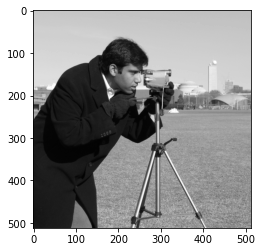

In [5]:
plt.imshow(camera, 'gray')

In [6]:
# Simple statistics
print('Image shape as array: %d x %d' % (camera.shape[0], camera.shape[1]))
print('Number of pixels in the image: %d' % camera.size)
print('Range of pixels: [%d, %d]' % (camera.min(), camera.max()))
print('Average pixel value: %.2f' % camera.mean())

Image shape as array: 512 x 512
Number of pixels in the image: 262144
Range of pixels: [0, 255]
Average pixel value: 129.06


_________________________________

In [17]:
#import my own image:

from skimage import io
colony = io.imread(r'F:\Pics\Pictures\Turkey\IMG_6290.JPG')
print(type(colony))
print(colony.shape)

<class 'numpy.ndarray'>
(3024, 4032, 3)


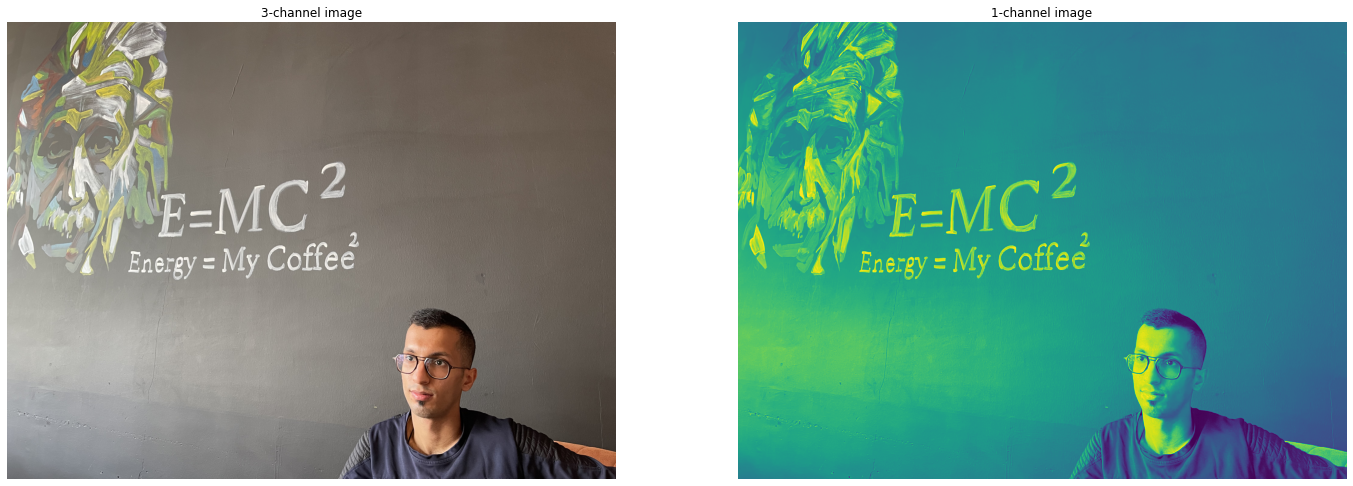

In [18]:
plt.figure(figsize=(24, 18))

# Plot all channels of a real image
plt.subplot(121)
plt.imshow(colony[:,:,:]) #all channels
plt.title('3-channel image')
plt.axis('off')

# Plot one channel only
plt.subplot(122)
plt.imshow(colony[:,:,0])  #RGB channels► Red, Green, Blue:= 0,1,2
plt.title('1-channel image')
plt.axis('off');


In [19]:
colony.min(), colony.max()   #range of pixels:

(0, 255)

In [22]:
colony.shape, colony.ravel() #one dimensional array of pixels

((3024, 4032, 3), array([106,  97,  82, ...,  35,  29,  31], dtype=uint8))

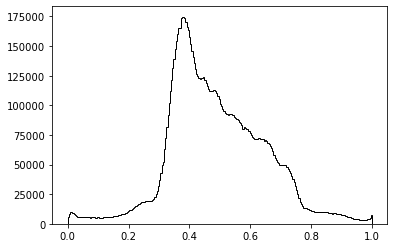

In [34]:
# Plot histogram
from skimage.color import rgb2gray #► make it 2D channel (White and Black)
img = rgb2gray(colony)
plt.hist(img.ravel(), bins=256, histtype='step', color='black');

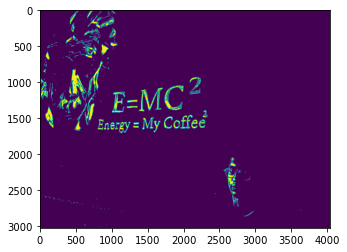

In [28]:
# Use thresholding
plt.imshow(img > 0.8)

In [30]:
from skimage.feature import canny
from scipy import ndimage as ndi
img_edges = canny(img)
img_filled = ndi.binary_fill_holes(img_edges)

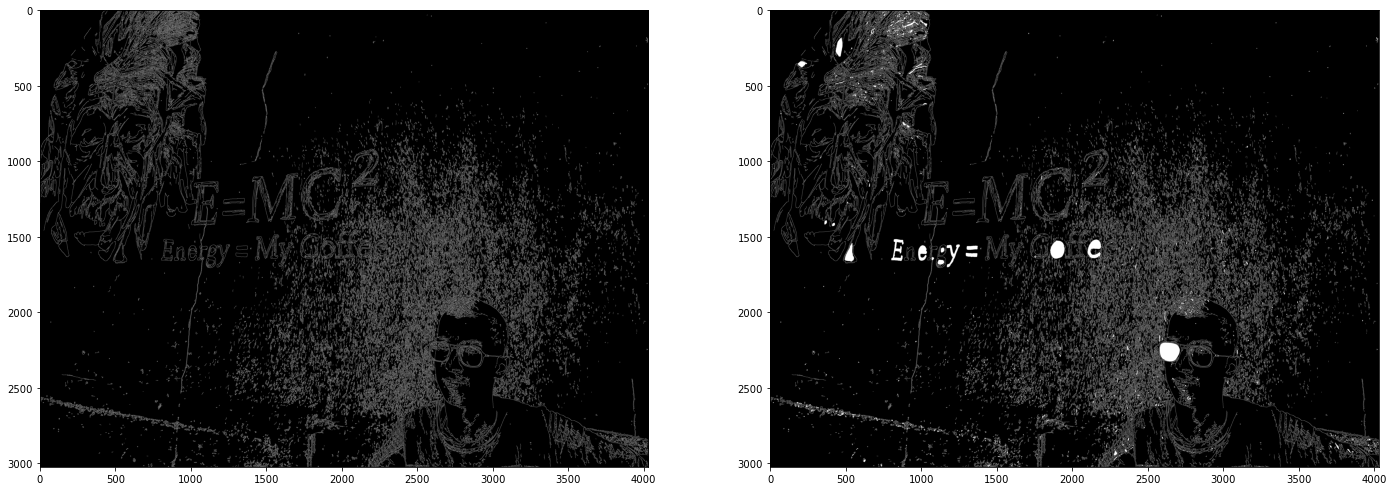

In [31]:
# Plot
plt.figure(figsize=(24, 18))
plt.subplot(121)
plt.imshow(img_edges, 'gray')
plt.subplot(122)
plt.imshow(img_filled, 'gray')

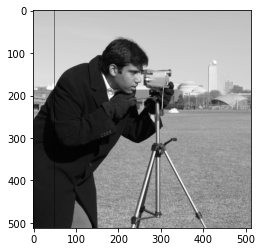

In [6]:
# Set the pixel at row 3, column 10 to black


#1)
#all rows and column 50
camera[:, 50] = 0   #black
plt.imshow(camera, 'gray')

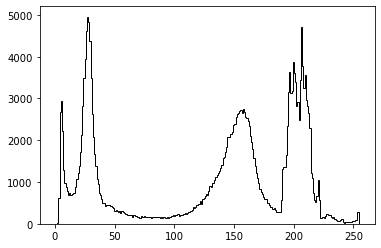

In [25]:
#histogram: 

img = data.camera()
plt.hist(img.ravel(), bins=256, histtype='step', color='black');

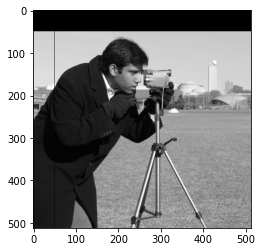

In [8]:
#2)
#the first 50 rows 
camera[:50] = 0   #black
plt.imshow(camera, 'gray')

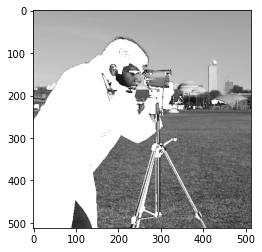

In [9]:
# Set to "white" (255) pixels where mask is True
camera = data.camera()
mask = camera < 87
camera[mask] = 255   #to white
plt.imshow(camera, 'gray')

<class 'numpy.ndarray'>
(300, 451, 3)


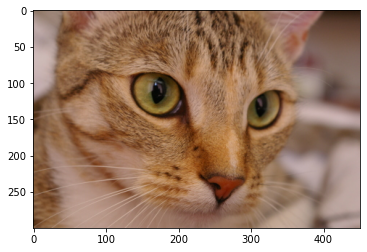

In [10]:
# Change the color for real images
cat = data.chelsea()
print(type(cat))
print(cat.shape)
plt.imshow(cat)

In [11]:
cat[50, 61]  #r,c by its pixels ► showing different intensity values as RGB:

array([164, 122,  82], dtype=uint8)

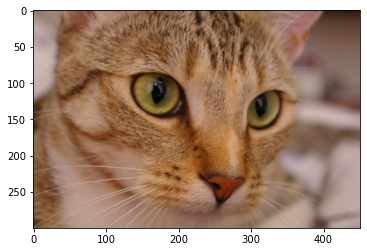

In [12]:
# Set the pixel at row 50, column 61 to green
# [red, green, blue]
cat[50, 61] = [0, 255, 0]
plt.imshow(cat)

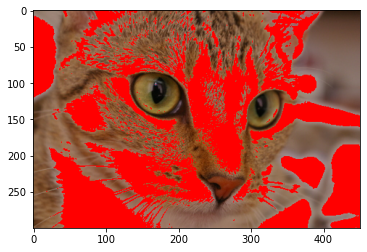

In [13]:
# Set brighter pixels to red
cat = data.chelsea()
red_cat = cat.copy()

reddish = cat[:, :, 0] > 160  #red
red_cat[reddish] = [255, 0, 0] #R: 255 ,,
plt.imshow(red_cat)

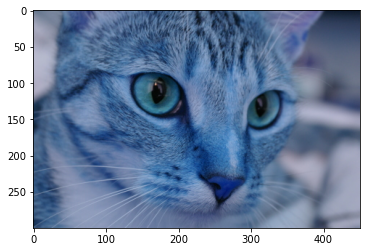

In [14]:
# Change RGB color to BGR for openCV
cat = data.chelsea()
BGR_cat = cat[:, :, ::-1]
plt.imshow(BGR_cat)

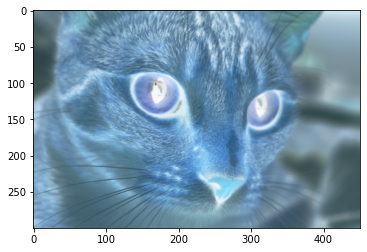

In [15]:
# Invert (or complement) an image
from skimage import util
inverted_cat = util.invert(cat)
plt.imshow(inverted_cat)

# Segmentation:

In [32]:
# Canny edge detector on cat
img_edges_cat = canny(cat[:,:,0]/255.)
img_filled_cat = ndi.binary_fill_holes(img_edges_cat)

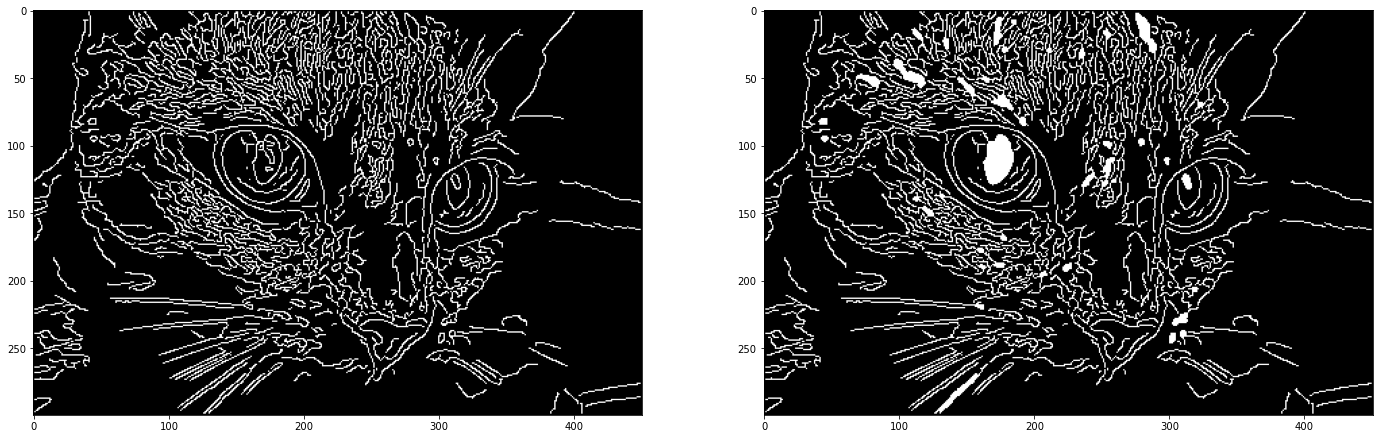

In [33]:
# Plot edge detection by canny:
plt.figure(figsize=(24, 18))
plt.subplot(121)
plt.imshow(img_edges_cat, 'gray')
plt.subplot(122)
plt.imshow(img_filled_cat, 'gray')

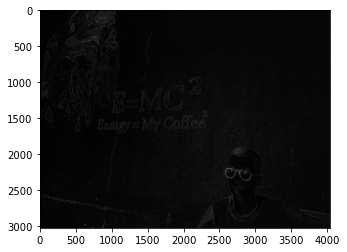

In [37]:
from skimage.filters import sobel
from skimage.morphology import watershed
# Elevation map
elevation_map = sobel(img)
plt.imshow(elevation_map, 'gray')

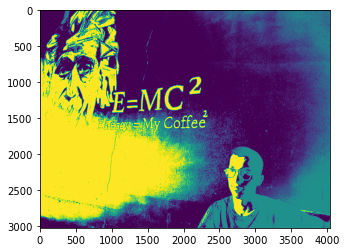

In [39]:
# Separate pixels into 3 classes
markers = np.zeros_like(img)
markers[img < 0.35] = 1
markers[img > 0.55] = 2
plt.imshow(markers)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


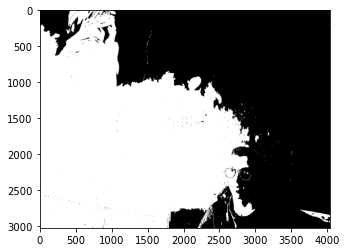

In [40]:
# Image segmentation using watershed transform
segmentation = watershed(elevation_map, markers)
# Set background pixels to 0
segmentation[segmentation == 1] = 0
plt.imshow(segmentation, 'gray')

394


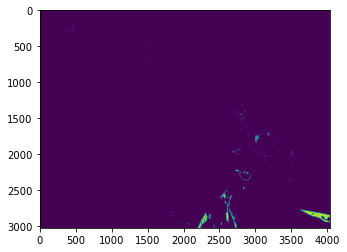

In [41]:
# Label segmented objects
labeled_colony, number = ndi.label(segmentation)
print(number) # 36*48 = 1536
plt.imshow(labeled_colony)